#  Import Labaraies

In [197]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load Dataset

In [198]:
data = pd.read_csv('cwurData.csv')

In [199]:
data

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


# Data Preprocessing

In [200]:
data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [201]:
data.tail()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015
2199,1000,China Pharmaceutical University,China,83,367,567,218,861,991,812,981.0,547,44.02,2015


In [202]:
# type of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [203]:
# all features 
data.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [204]:
# check the null value
data.isnull()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [205]:
# Describe the data
data.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


In [206]:
len(data.institution.unique())

1024

In [207]:
len(data.year.unique())

4

# Drop Columns

In [208]:
data.drop('institution' , axis=1 ,inplace = True)

In [209]:
data

,world_rank,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [210]:
data.drop('year' , axis=1 , inplace = True)

In [211]:
data

,world_rank,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score
0,1,USA,1,7,9,1,1,1,1,NaN,5,100.00
1,2,USA,2,9,17,3,12,4,4,NaN,1,91.67
2,3,USA,3,17,11,5,4,2,2,NaN,15,89.50
3,4,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17
4,5,USA,4,2,29,7,37,22,22,NaN,18,85.21
...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,Portugal,7,367,567,218,926,845,812,969.0,816,44.03
2196,997,Egypt,4,236,566,218,997,908,645,981.0,871,44.03
2197,998,Brazil,18,367,549,218,830,823,812,975.0,824,44.03
2198,999,Spain,40,367,567,218,886,974,812,975.0,651,44.02


In [212]:
data.drop('country' , axis=1 , inplace = True)

In [213]:
data

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score
0,1,1,7,9,1,1,1,1,NaN,5,100.00
1,2,2,9,17,3,12,4,4,NaN,1,91.67
2,3,3,17,11,5,4,2,2,NaN,15,89.50
3,4,1,10,24,4,16,16,11,NaN,50,86.17
4,5,4,2,29,7,37,22,22,NaN,18,85.21
...,...,...,...,...,...,...,...,...,...,...,...
2195,996,7,367,567,218,926,845,812,969.0,816,44.03
2196,997,4,236,566,218,997,908,645,981.0,871,44.03
2197,998,18,367,549,218,830,823,812,975.0,824,44.03
2198,999,40,367,567,218,886,974,812,975.0,651,44.02


In [214]:
# check the null value
np.sum(data.isnull())

world_rank                0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
dtype: int64

In [215]:
data.drop('broad_impact' , axis=1 , inplace = True)

In [216]:
data

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
0,1,1,7,9,1,1,1,1,5,100.00
1,2,2,9,17,3,12,4,4,1,91.67
2,3,3,17,11,5,4,2,2,15,89.50
3,4,1,10,24,4,16,16,11,50,86.17
4,5,4,2,29,7,37,22,22,18,85.21
...,...,...,...,...,...,...,...,...,...,...
2195,996,7,367,567,218,926,845,812,816,44.03
2196,997,4,236,566,218,997,908,645,871,44.03
2197,998,18,367,549,218,830,823,812,824,44.03
2198,999,40,367,567,218,886,974,812,651,44.02


In [217]:
# drop broad_impact columns
np.sum(data.isnull())

world_rank              0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
patents                 0
score                   0
dtype: int64

# Select Features and Target Value

In [218]:
y = data['world_rank']
x = data.drop('world_rank' , axis=1)

In [219]:
y

0          1
1          2
2          3
3          4
4          5
        ... 
2195     996
2196     997
2197     998
2198     999
2199    1000
Name: world_rank, Length: 2200, dtype: int64

In [220]:
x

,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
0,1,7,9,1,1,1,1,5,100.00
1,2,9,17,3,12,4,4,1,91.67
2,3,17,11,5,4,2,2,15,89.50
3,1,10,24,4,16,16,11,50,86.17
4,4,2,29,7,37,22,22,18,85.21
...,...,...,...,...,...,...,...,...,...
2195,7,367,567,218,926,845,812,816,44.03
2196,4,236,566,218,997,908,645,871,44.03
2197,18,367,549,218,830,823,812,824,44.03
2198,40,367,567,218,886,974,812,651,44.02


# Standardized Scaler

In [221]:
# convert dataframe 
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x) , columns = x.columns)

In [222]:
x

,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
0,-0.759305,-2.199214,-1.864211,-2.777926,-1.511102,-1.512871,-1.560375,-1.563683,6.727841
1,-0.739974,-2.182808,-1.821370,-2.746694,-1.474881,-1.502979,-1.549025,-1.578285,5.654255
2,-0.720642,-2.117185,-1.853501,-2.715462,-1.501224,-1.509574,-1.556592,-1.527178,5.374581
3,-0.759305,-2.174605,-1.783884,-2.731078,-1.461710,-1.463409,-1.522540,-1.399410,4.945405
4,-0.701311,-2.240229,-1.757109,-2.684229,-1.392561,-1.443625,-1.480922,-1.516227,4.821678
...,...,...,...,...,...,...,...,...,...
2195,-0.643316,0.753847,1.123952,0.610775,1.534754,1.270193,1.508032,1.396881,-0.485678
2196,-0.701311,-0.320739,1.118597,0.610775,1.768544,1.477933,0.876190,1.597659,-0.485678
2197,-0.430670,0.753847,1.027560,0.610775,1.218643,1.197648,1.508032,1.426085,-0.485678
2198,-0.005378,0.753847,1.123952,0.610775,1.403041,1.695566,1.508032,0.794547,-0.486967


# Traning Model

In [223]:
x_train , x_test , y_train , y_test = train_test_split(x , y  , train_size=0.8)

In [224]:
print('Shape of x_train = ' , x_train.shape)
print('Shape of y_train = ' , y_train.shape)
print('Shape of x_test = ' , x_test.shape)
print('Shape of y_test = ' , y_test.shape)

Shape of x_train =  (1760, 9)
Shape of y_train =  (1760,)
Shape of x_test =  (440, 9)
Shape of y_test =  (440,)


# Linear regression

In [225]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [226]:
model.fit(x_train , y_train)

LinearRegression()

In [227]:
r_sq = model.score(x_test , y_test)

In [228]:
r_sq

0.9080745388517206

In [229]:
# cofficent 
print(f" cofficent of determination : {r_sq}")

 cofficent of determination : 0.9080745388517206


In [230]:
# intercept
print(f" intercept : {model.intercept_}")

 intercept : 460.41871016911756


In [231]:
# slope 
print(f" slope : {model.coef_}")

 slope : [ -2.66902478  10.4765427   48.99198334  -9.80959194 128.7733352
  85.20451966  41.61943478  26.40730269   2.82173045]


In [232]:
# prediction 
pred_y = model.predict(x_test)


# Decision Tree Regressor

In [233]:
# decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [234]:
tree = DecisionTreeRegressor()

In [235]:
tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [236]:
tree.score(x_test,y_test)

0.9937043027893552

In [237]:
# prediction
pred_y1 = tree.predict(x_test)

#  Random Forest Regressor

In [238]:
# random forest
from sklearn.ensemble import RandomForestRegressor

In [239]:
rf =  RandomForestRegressor()


In [240]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [241]:
rf.score(x_test , y_test)

0.9972547627572161

In [242]:
# prediction
pred_y2 = rf.predict(x_test)


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='world_rank'>

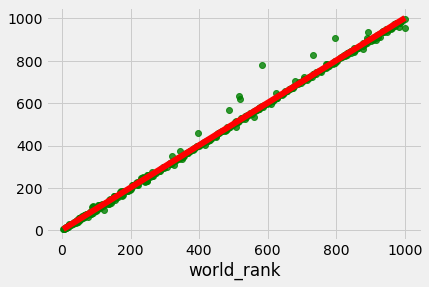

In [243]:
# random forest regressor check the model reg plot
import seaborn as sns
sns.regplot(y_test, pred_y2, scatter_kws = {'color': 'g'}, line_kws = {'color': 'red'})

# Mutiple

Coefficients:  [ -2.66902478  10.4765427   48.99198334  -9.80959194 128.7733352
  85.20451966  41.61943478  26.40730269   2.82173045]
Variance score: 0.9080745388517206


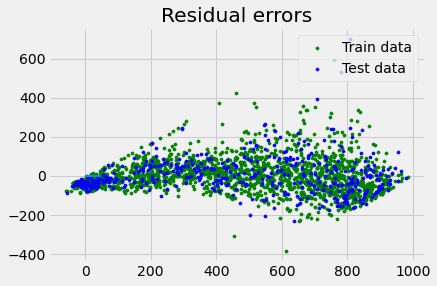

In [244]:
# multiple
# create linear regression object
import matplotlib.pyplot as plt
reg = LinearRegression()

# train the model using the training sets
reg.fit(x_train, y_train)

# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(x_test, y_test)))

# plot for residual error

## setting plot style
plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(reg.predict(x_train), reg.predict(x_train) - y_train,
			color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
plt.scatter(reg.predict(x_test), reg.predict(x_test) - y_test,
			color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## plotting legend
plt.legend(loc = 'upper right')

## plot title
plt.title("Residual errors")

## method call for showing the plot
plt.show()


In [245]:
# prediction
pred1 = reg.predict(x_test)


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='world_rank'>

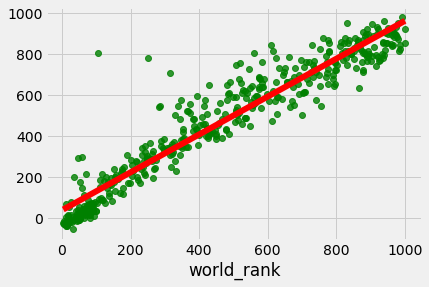

In [246]:
#mutiple regressor check the model
sns.regplot(y_test, pred1, scatter_kws = {'color': 'g'}, line_kws = {'color': 'red'})

# Polynmial Features

In [247]:
# polynmial
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [248]:
pl = PolynomialFeatures(degree=3 , include_bias=False).fit_transform(x)

In [249]:
pl = LinearRegression()
pl.fit(x_test, y_test)

LinearRegression()

In [250]:
pl.score(x_test , y_test)

0.9101347501537377

In [251]:
r_sq = pl.score(x_test, y_test)
# cofficient 
print(f"coefficient of determination: {r_sq}")
# intercept
print(f"intercept: {pl.intercept_}")
# slope 
print(f"coefficients: {pl.coef_}")

coefficient of determination: 0.9101347501537377
intercept: 456.73588773475944
coefficients: [  4.18220336  18.38653828  49.85659035 -16.35510002 131.67345691
  88.51527842  31.32425359  16.43803797  -1.92640909]


In [252]:
# prediction
pred5 = pl.predict(x_test)


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='world_rank'>

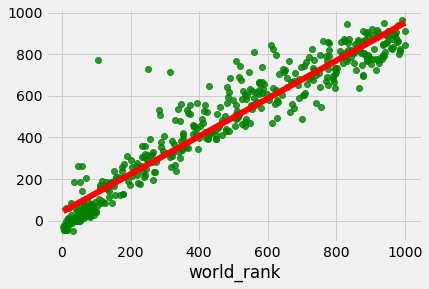

In [253]:
sns.regplot(y_test, pred5, scatter_kws = {'color': 'g'}, line_kws = {'color': 'red'})

# R2 , RMSE , MSE , MAE

In [254]:
# Linear regressor
# r2 score / r_sq are the same score find
from sklearn.metrics import r2_score
r2_score(y_test, pred_y)

0.9080745388517206

In [255]:
# MSE , RMSE , MAE linear regressor
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
mse = mean_squared_error(y_test, pred_y)
rmse = mean_squared_error(y_test, pred_y, squared = False)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))
print("Mean Absolute error :" , metrics.mean_absolute_error(y_test,pred_y))

MSE:  8974.798115094001
RMSE:  4487.399057547001
Mean Absolute error : 67.2949917703886


In [256]:
# decision tree
# r2 score / r_sq are the same score find
from sklearn.metrics import r2_score
r2_score(y_test, pred_y1)

0.9937043027893552

In [257]:
# Decision Tree Regressor
# MSE , RMSE , MAE decision tree regressor
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
mse = mean_squared_error(y_test, pred_y1)
rmse = mean_squared_error(y_test, pred_y1, squared = False)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))
print("Mean Absolute error :" , metrics.mean_absolute_error(y_test,pred_y1))


MSE:  614.6568181818182
RMSE:  307.3284090909091
Mean Absolute error : 9.01590909090909


In [258]:
#r2_score find
# random forest regressor
from sklearn.metrics import r2_score
r2_score(y_test, pred_y2)

0.9972547627572161

In [259]:
# random forest regressor
# MSE , RMSE , MAE random forest regressor
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
mse = mean_squared_error(y_test, pred_y2)
rmse = mean_squared_error(y_test, pred_y2, squared = False)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))
print("Mean Absolute error :" , metrics.mean_absolute_error(y_test,pred_y2))

MSE:  268.02095659090907
RMSE:  134.01047829545453
Mean Absolute error : 6.530749999999999


In [260]:
# mutliple regressor
# r2_score find mutiple 
from sklearn.metrics import r2_score
r2_score(y_test, pred1)

0.9080745388517206

In [261]:
# mutliple regressor
# MSE , RMSE , MAE mutliple regressor
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
mse = mean_squared_error(y_test, pred1)
rmse = mean_squared_error(y_test, pred1, squared = False)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))
print("Mean Absolute error :" , metrics.mean_absolute_error(y_test,pred1))

MSE:  8974.798115094001
RMSE:  4487.399057547001
Mean Absolute error : 67.2949917703886


In [262]:
# r2_score polynmial features
from sklearn.metrics import r2_score
r2_score(y_test, pred5)

0.9101347501537377

In [263]:
# polynmial features
# MSE , RMSE , MAE polynmial features
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
mse = mean_squared_error(y_test, pred5)
rmse = mean_squared_error(y_test, pred5, squared = False)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))
print("Mean Absolute error :" , metrics.mean_absolute_error(y_test,pred5))

MSE:  8773.657100634327
RMSE:  4386.828550317164
Mean Absolute error : 66.77682651584357


# Data Visulaization / Distribution Varaible

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='world_rank', ylabel='count'>

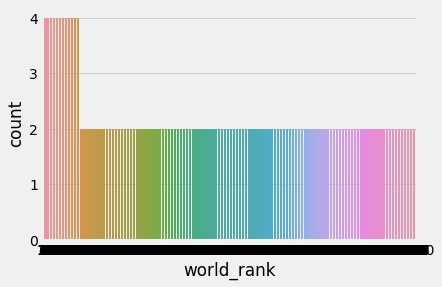

In [264]:
import seaborn as sns
sns.countplot(data['world_rank'])
# the distribution of world is left skewed

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='national_rank', ylabel='count'>

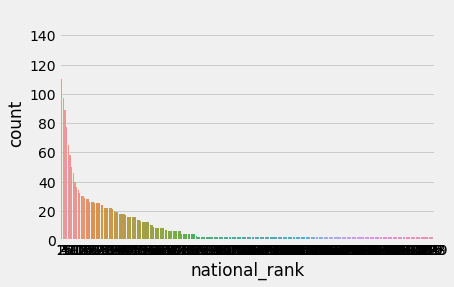

In [265]:
sns.countplot(data['national_rank'])
# the distribution of national_rank is left skewed

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='publications', ylabel='count'>

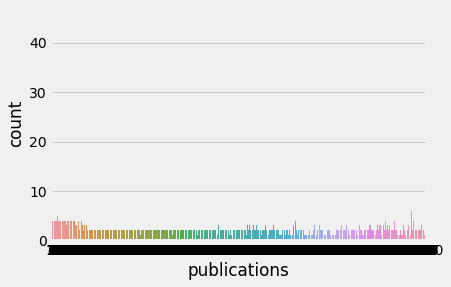

In [266]:
sns.countplot(data['publications'])
# the distribution of national_rank is left skewed

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score', ylabel='count'>

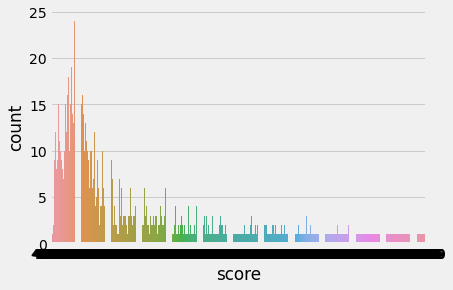

In [267]:
sns.countplot(data['score'])
# the distribution of score is left skewed

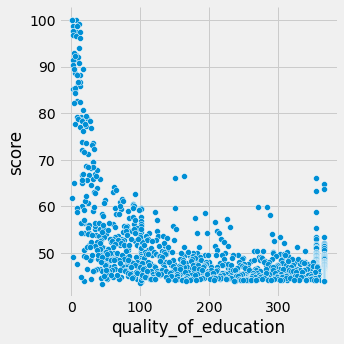

In [268]:
sns.relplot(x =  'quality_of_education' , y = 'score' , data = data )
# the distribution of quality_of_education , score is left skewed apply relplot

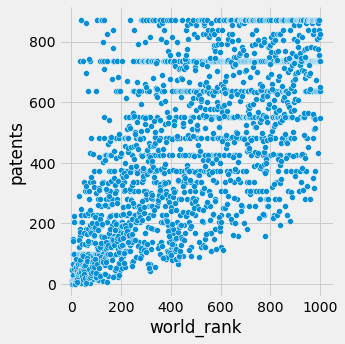

In [269]:
sns.relplot(x =  'world_rank' , y = 'patents' , data = data )
# the distribution of world_rank , year  apply relplot

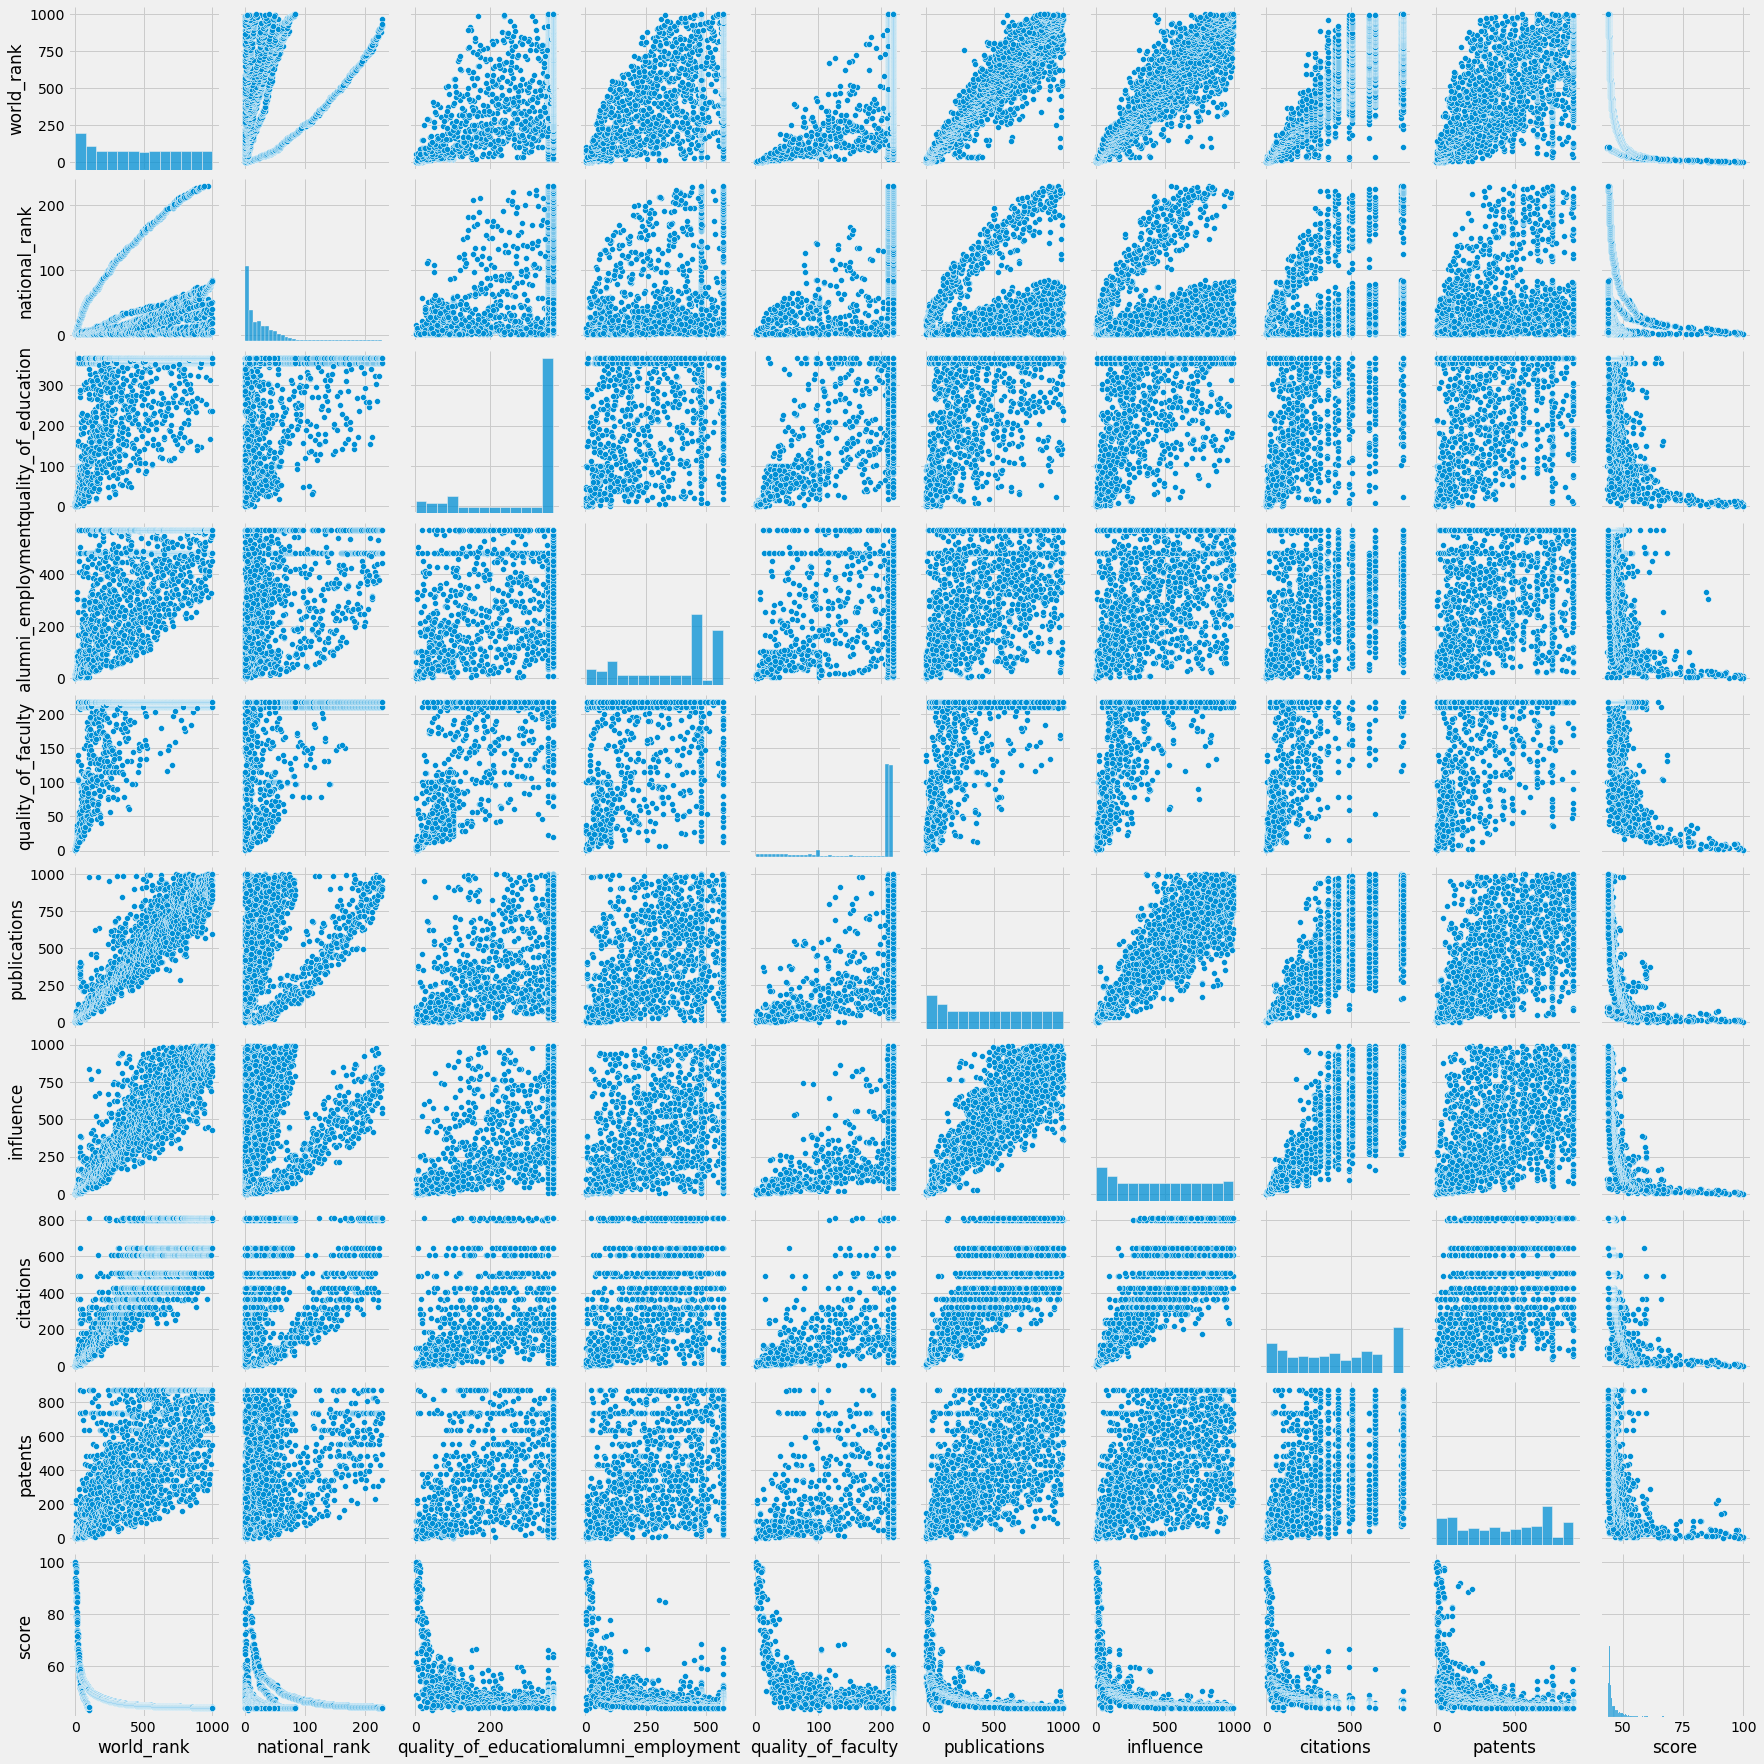

In [270]:
sns.pairplot(data)
# all column pair graph show (left skewed , right skewed at so no)

# Draw Correlation Matrix

In [271]:
data.corr()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
world_rank,1.000000,0.238553,0.676166,0.668529,0.663864,0.923037,0.895871,0.856573,0.698214,-0.549098
national_rank,0.238553,1.000000,0.211975,0.135342,0.222833,0.326857,0.161086,0.186797,0.159440,-0.199756
quality_of_education,0.676166,0.211975,1.000000,0.606421,0.786181,0.624657,0.645641,0.630455,0.528120,-0.600541
alumni_employment,0.668529,0.135342,0.606421,1.000000,0.558618,0.572096,0.527382,0.559200,0.528219,-0.510374
quality_of_faculty,0.663864,0.222833,0.786181,0.558618,1.000000,0.634423,0.656406,0.652186,0.555107,-0.693540
publications,0.923037,0.326857,0.624657,0.572096,0.634423,1.000000,0.874952,0.829912,0.671558,-0.522111
influence,0.895871,0.161086,0.645641,0.527382,0.656406,0.874952,1.000000,0.845207,0.611811,-0.522837
citations,0.856573,0.186797,0.630455,0.559200,0.652186,0.829912,0.845207,1.000000,0.598728,-0.522438
patents,0.698214,0.159440,0.528120,0.528219,0.555107,0.671558,0.611811,0.598728,1.000000,-0.474810
score,-0.549098,-0.199756,-0.600541,-0.510374,-0.693540,-0.522111,-0.522837,-0.522438,-0.474810,1.000000


In [273]:
print(data[['world_rank',  'national_rank', 'quality_of_education',
       'alumni_employment', 'quality_of_faculty', 'publications', 'influence',
       'citations', 'patents', 'score']].corr(method ='pearson'))

                      world_rank  national_rank  quality_of_education  \
world_rank              1.000000       0.238553              0.676166   
national_rank           0.238553       1.000000              0.211975   
quality_of_education    0.676166       0.211975              1.000000   
alumni_employment       0.668529       0.135342              0.606421   
quality_of_faculty      0.663864       0.222833              0.786181   
publications            0.923037       0.326857              0.624657   
influence               0.895871       0.161086              0.645641   
citations               0.856573       0.186797              0.630455   
patents                 0.698214       0.159440              0.528120   
score                  -0.549098      -0.199756             -0.600541   

                      alumni_employment  quality_of_faculty  publications  \
world_rank                     0.668529            0.663864      0.923037   
national_rank                  0.135342   

In [274]:
# Draw heatmap of correlation matrix
cor = data.corr(method='pearson')

#Using Kendal Correlation
#cor = data.corr(method ='kendall')

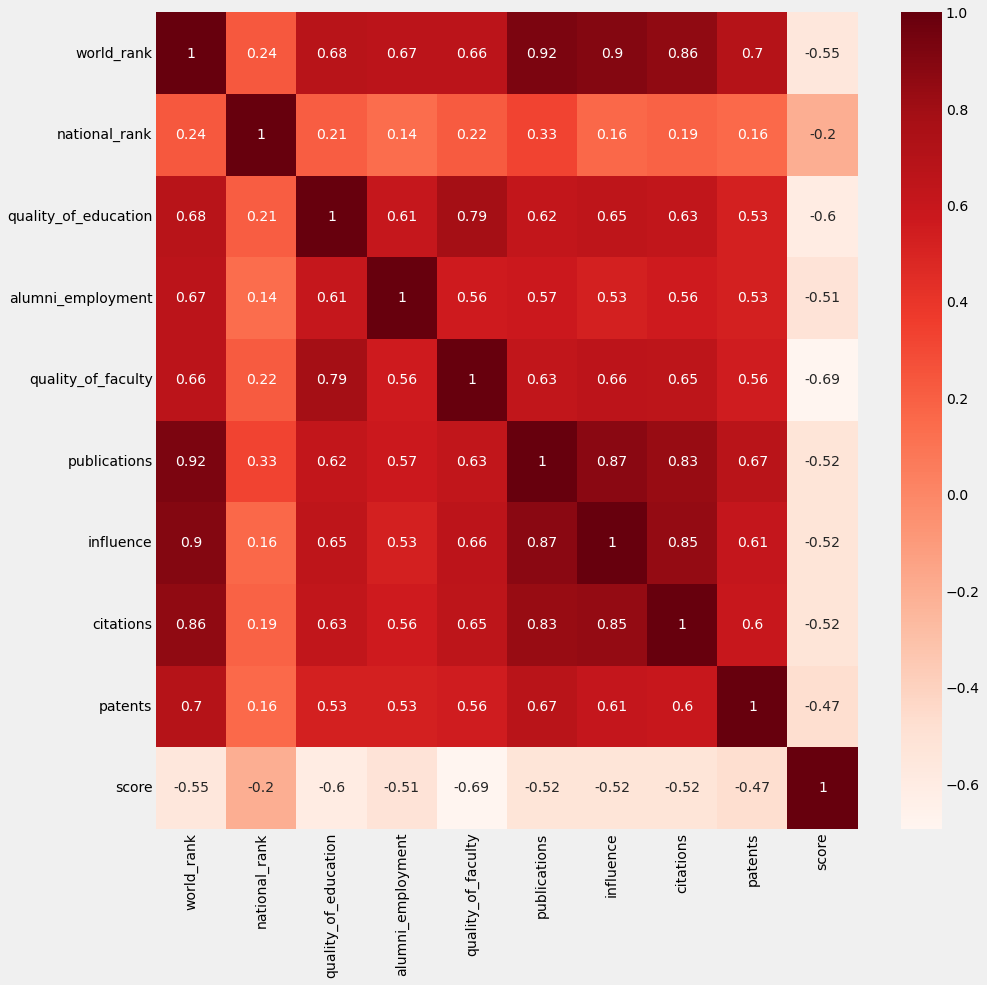

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,14))

sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [276]:
# total features 2200 the train and testing/ training(1760) , testing(440) 
print(x_train.shape , x_test.shape)

(1760, 9) (440, 9)


In [277]:
x_train.shape

(1760, 9)

In [278]:
x_test.shape

(440, 9)

<function matplotlib.pyplot.show(close=None, block=None)>

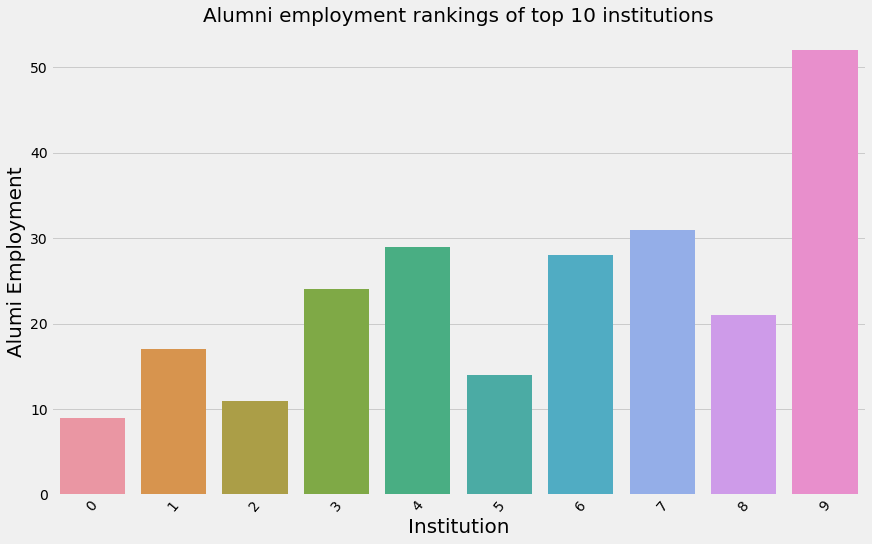

In [279]:
topi= data.head(10)

plt.figure(figsize=(13,8))

sns.barplot(x=topi.index , y=topi['alumni_employment'])
sns.barplot(x=topi.index , y=topi['alumni_employment']).set_xticklabels(labels=topi.index, rotation=50)

plt.xlabel("Institution", fontsize=20)
plt.ylabel("Alumi Employment", fontsize=20)
plt.title("Alumni employment rankings of top 10 institutions", fontsize=20)
plt.show

In [ ]:
topi= data.head(10)

plt.figure(figsize=(10,6))

sns.scatterplot(x="quality_of_education", y="alumni_employment", data=topi)

plt.title("Rankings of quality of education and alumni employment", fontsize=20)
plt.xlabel("Quality of education", fontsize=20)
plt.ylabel("Alumni Employment", fontsize=20)
plt.show

In [ ]:
topi= data.head(10)

#topi.info()

topi_f = topi.loc[:,['world_rank','national_rank','quality_of_education','alumni_employment'
                      ,'quality_of_faculty','publications','influence','citations','patents','score']]

plt.figure(figsize=(12,6))

sns.heatmap(data=topi_f, annot=True)

plt.show

C:\Users\HP\AppData\Local\Temp\ipykernel_17644\2359114747.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.lineplot(data=topi_f, linestyle='--').set_xticklabels(labels=topi_f.index, rotation=60)


<function matplotlib.pyplot.show(close=None, block=None)>

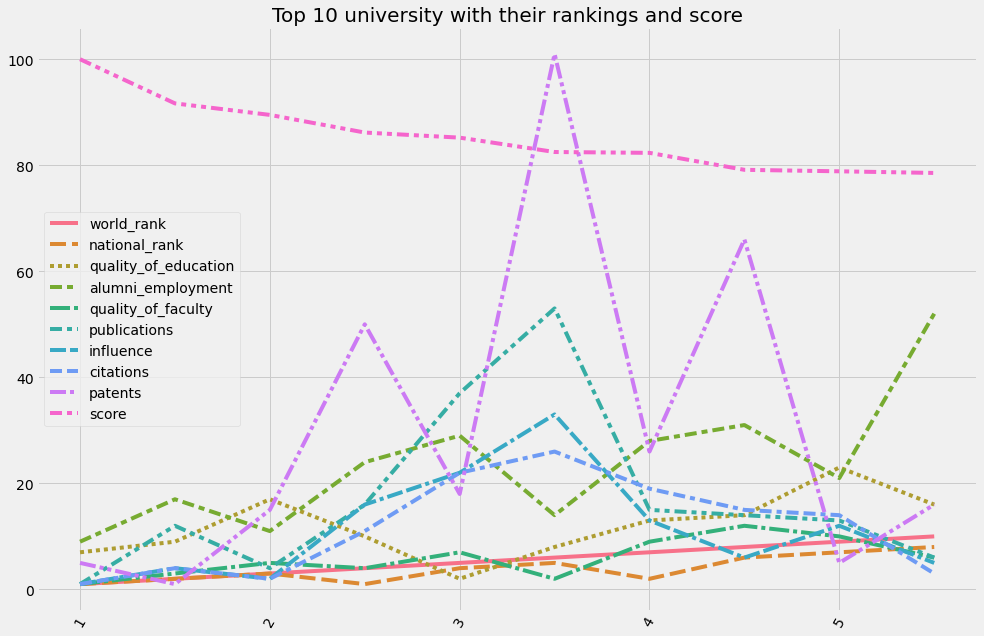

In [281]:
topi_f = topi.loc[:,['world_rank','national_rank','quality_of_education','alumni_employment'
                      ,'quality_of_faculty','publications','influence','citations','patents','score']]

plt.figure(figsize=(15,10))

sns.lineplot(data=topi_f, linestyle='--').set_xticklabels(labels=topi_f.index, rotation=60)

plt.title("Top 10 university with their rankings and score", fontsize=20)
plt.show

<AxesSubplot:xlabel='citations'>

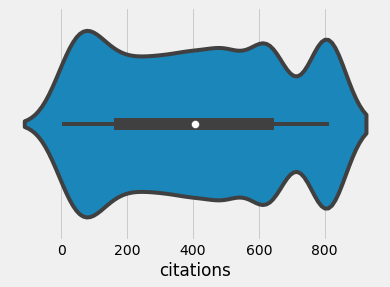

In [282]:
sns.violinplot(x=data["citations"] )

<AxesSubplot:xlabel='publications', ylabel='world_rank'>

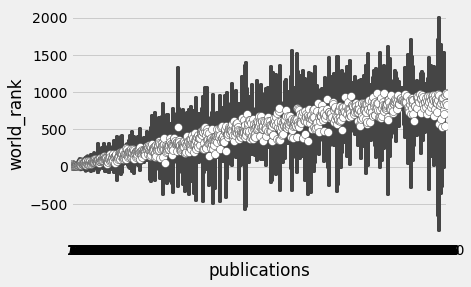

In [283]:
sns.violinplot(x ='publications', y ='world_rank', data = data, linewidth = 4)

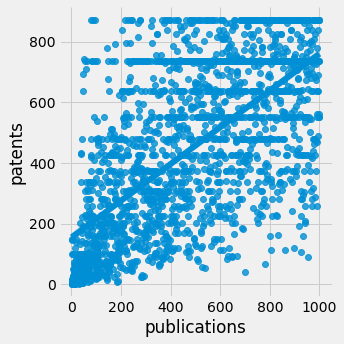

In [285]:
sns.lmplot(x ='publications', y = 'patents', data = data)

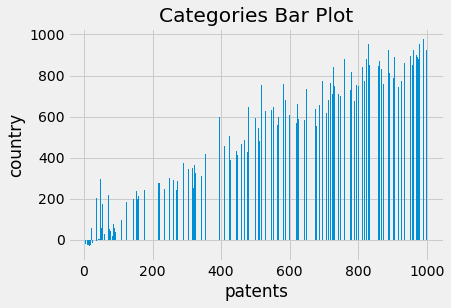

In [286]:
# Simple Bar Plot
plt.bar(y_test , pred1)
plt.xlabel('patents')
plt.ylabel("country")
plt.title('Categories Bar Plot')
plt.show()

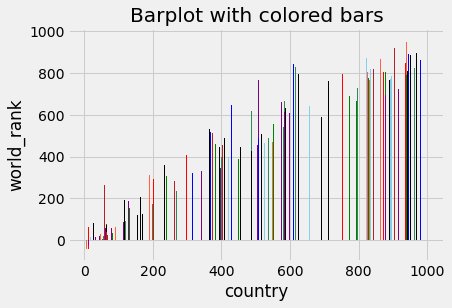

In [287]:
plt.bar(y_test,pred5, color=['firebrick', 'green', 'blue', 'black', 'red',
                    'purple', 'seagreen', 'skyblue', 'black', 'tomato'])
plt.xlabel('country')
plt.ylabel("world_rank")
plt.title('Barplot with colored bars')
plt.show()